In [51]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# import dataset called "mnist" consists of 70,000 grayscale images in 10 categories.
# Each image is 28x28 pixels
fashion_mnist = tf.keras.datasets.fashion_mnist

# train_images and train_labels arrays are the training sets
# test_images, test_labels arrays are data will be used against the trained models
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [56]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [58]:
# check how many images in the training set and which size is each images are in
train_images.shape

(60000, 28, 28)

In [59]:
# check how many images in the test set and which size is each images are in
test_images.shape

(10000, 28, 28)

In [61]:
# check how many labels are in the training data set
len(train_labels)

60000

In [62]:
# check how many labels in the test data set
len(test_labels)

10000

In [63]:
# print the labels.
# in this training set, each label has int between 0 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

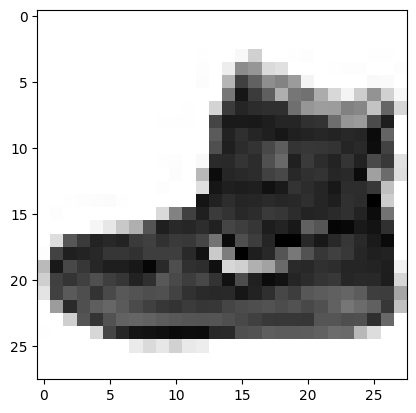

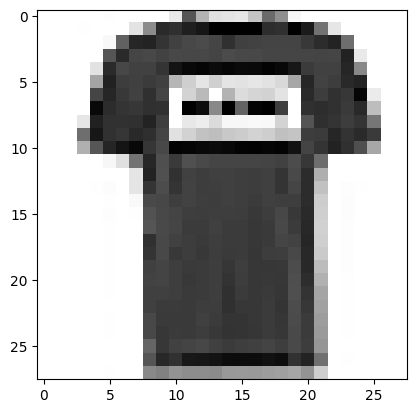

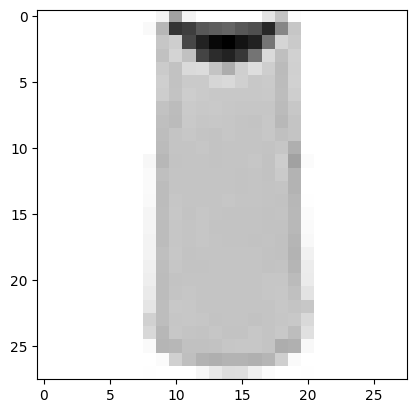

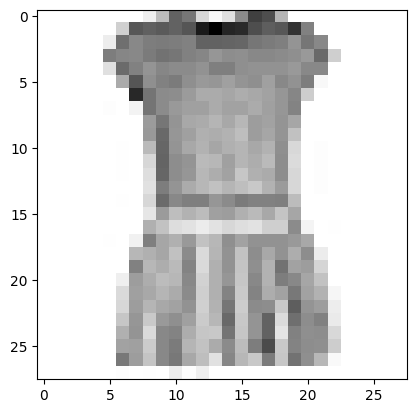

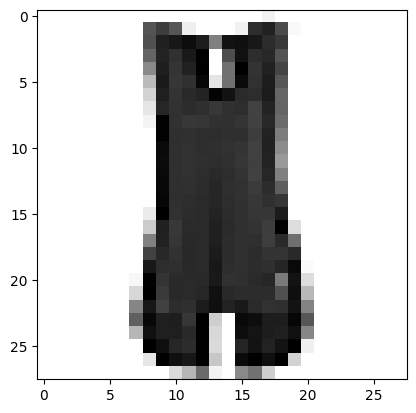

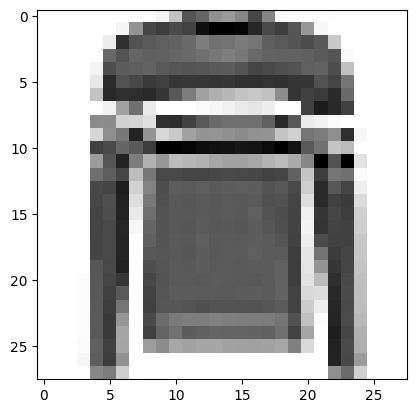

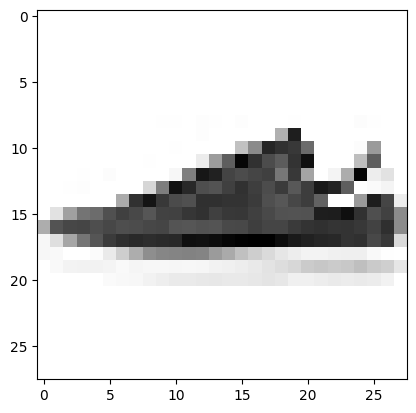

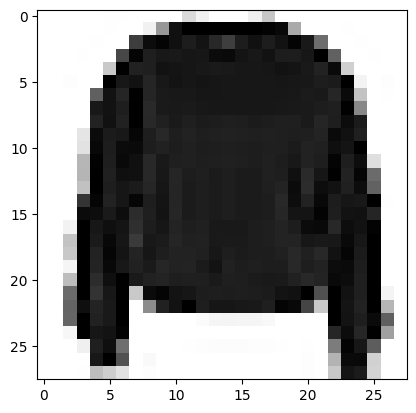

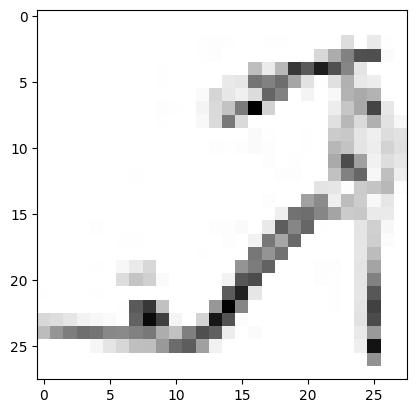

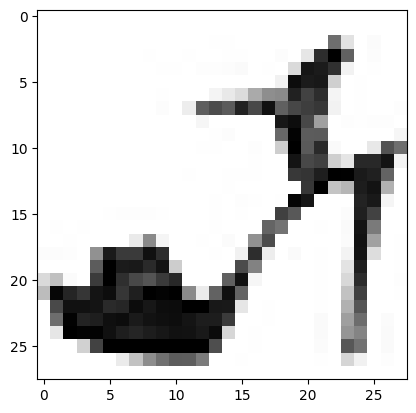

In [64]:
# print the first 10 images to see what data we are working with
# print the first 10 images, in black and white color

for i in range(10):
    plt.imshow(train_images[i], cmap="Greys")
    plt.show()

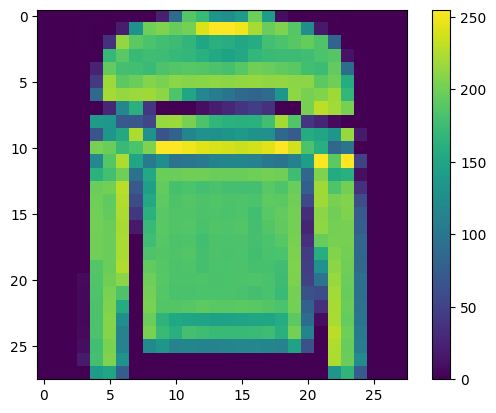

In [65]:
# see details of a single image
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [66]:
# Scale pixel values to a range of 0 to 1 before feeding them to the neural network model
# by dividing them by 255
train_images = train_images / 255.0
test_images = test_images / 255.0

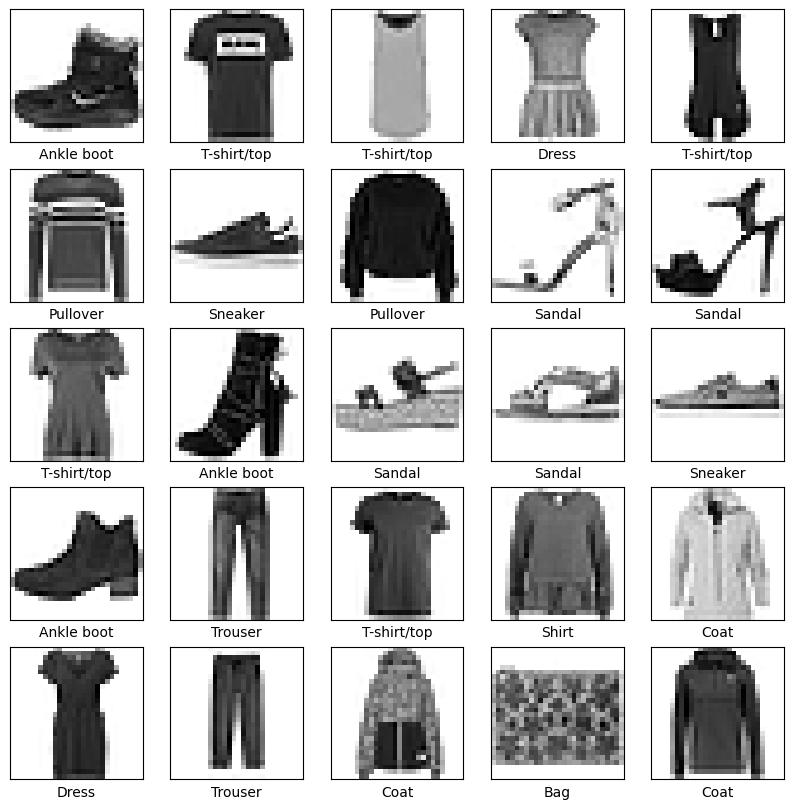

In [67]:
# print first 25 images to verify if they are in the correct format

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [68]:
# setting up layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
# complie the models
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [70]:
# train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7815 - loss: 0.6213
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8622 - loss: 0.3876
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8762 - loss: 0.3399
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8829 - loss: 0.3111
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8933 - loss: 0.2908
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8968 - loss: 0.2789
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9009 - loss: 0.2659
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9053 - loss: 0.2488
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9065 - loss: 0.2476
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9122 - loss: 0.2371


In [71]:
# evaluate the accuracy and loss of the model in the test model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8846 - loss: 0.3304

Test accuracy: 0.8845999836921692


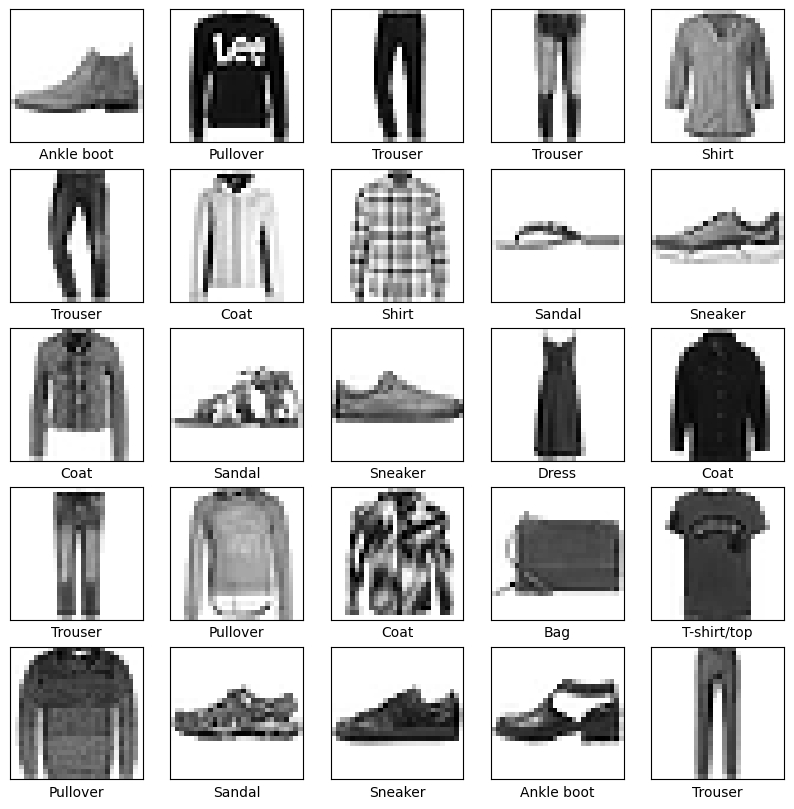

In [72]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [73]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([2.6028147e-07, 1.5620945e-09, 1.3477864e-09, 7.5803417e-09,
       1.9093070e-08, 6.7468695e-03, 3.2130707e-08, 5.5385981e-02,
       1.9159447e-06, 9.3786496e-01], dtype=float32)

In [74]:
np.argmax(predictions[0])

np.int64(9)

In [75]:
test_labels[0]

np.uint8(9)

In [76]:
# graph all 10 class predictions

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{:2.0f}% ({})".format(100*np.max(predictions_array),
                                    class_names[predicted_label],
                                    class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

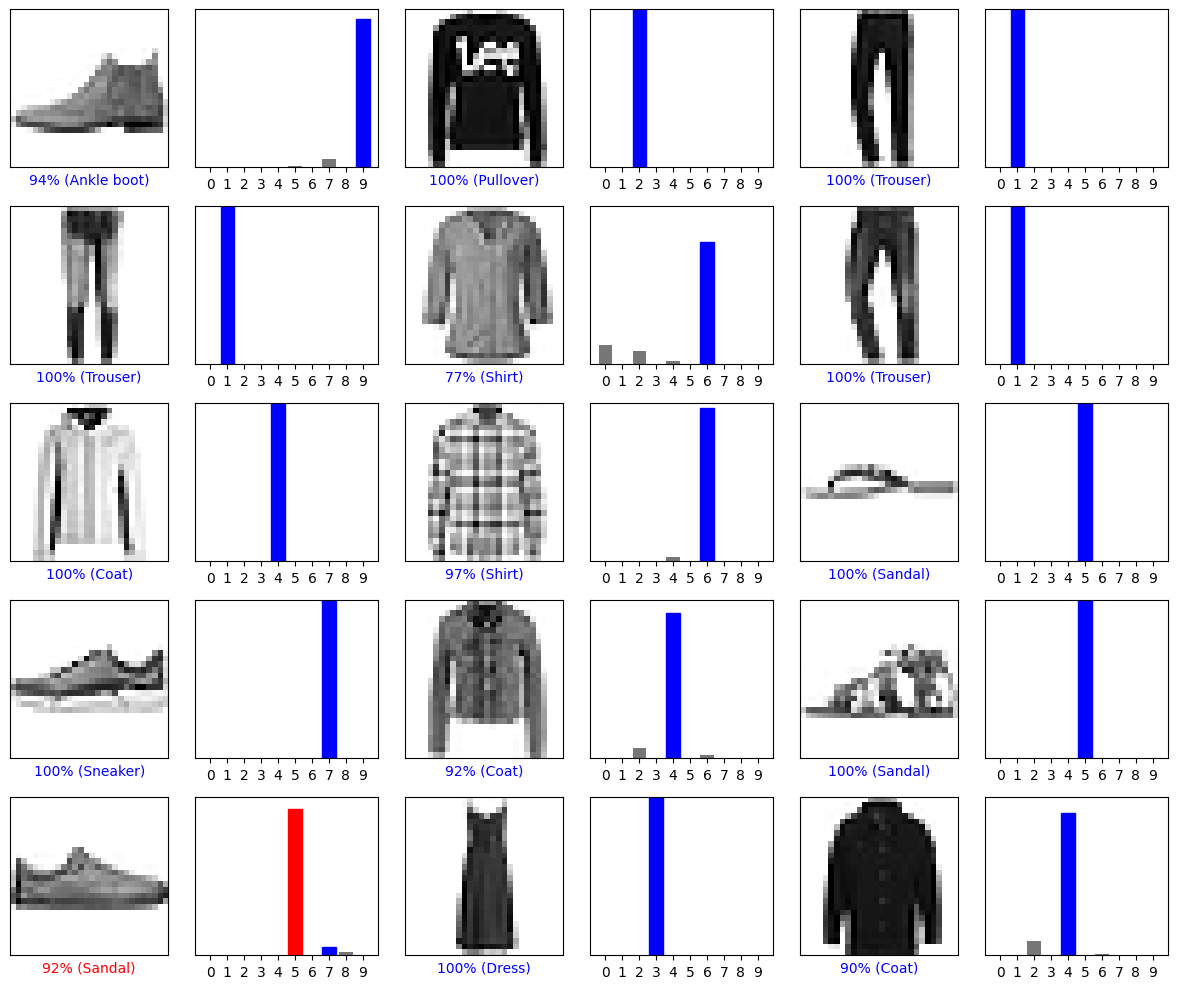

In [77]:
# Plot the first 15 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()